In [1]:
import h5py
import numpy as np
import time


In [2]:
# create an HDF5 file
f = h5py.File('test6.h5', 'w')

# create a group
g = f.create_group('group')

# create a dataset with two columns: datetime and acceleration
g.create_dataset(name='left_hand_data', 
                 shape=(0, 2), 
                 maxshape=(None, 2), 
                 chunks=(1000, 2),
                 dtype='f8')  # Use 'f8' for float64, which is a standard double-precision float

# write 10 data points to the dataset, using the current time for datetime
for i in range(10):
    # get the current time
    t = time.time()
    # append the data to the dataset
    g['left_hand_data'].resize(g['left_hand_data'].shape[0] + 1, axis=0)
    g['left_hand_data'][-1] = np.array([t, i])
    # wait for 1 second
    time.sleep(1)
# close the file
f.close()


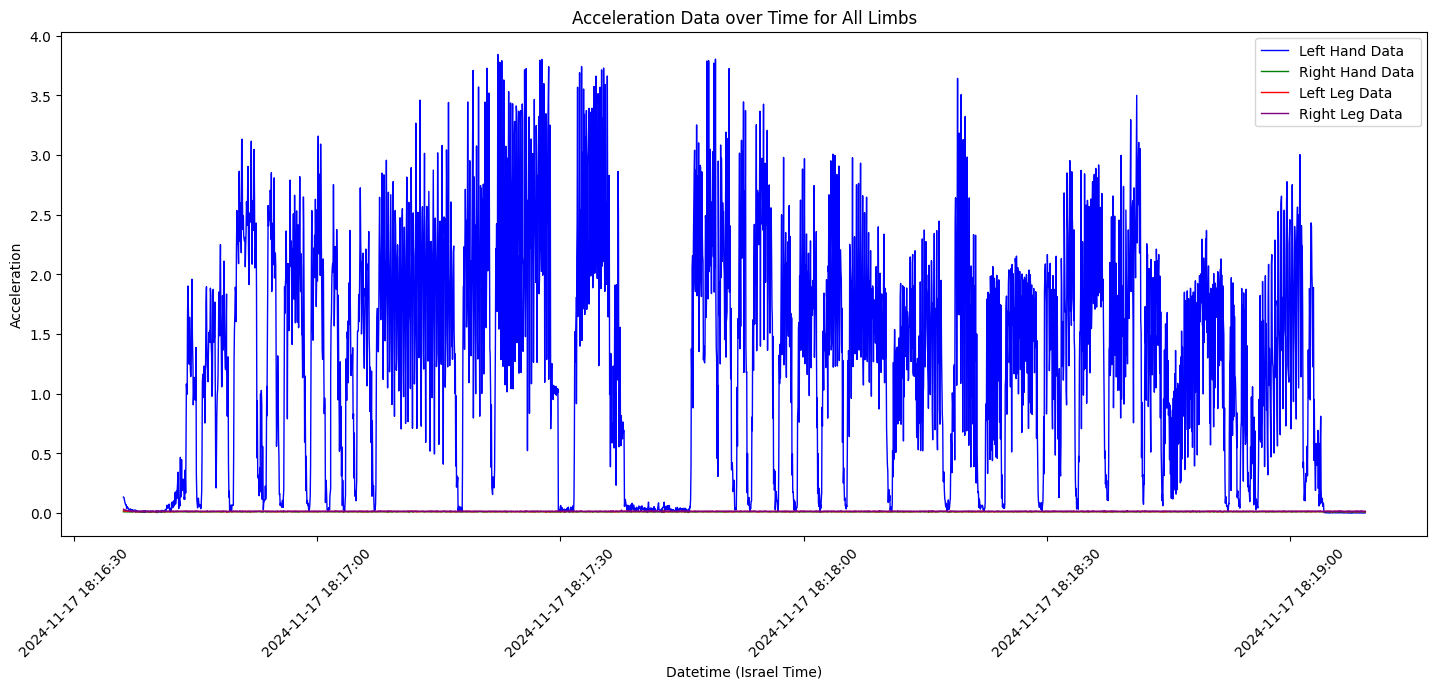

In [58]:
# import the relevant libraries
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the Israel time offset (UTC+2)
israel_time_offset = pd.Timedelta(hours=2)

# plot data
# Attempting a simplified approach to plot the "left_hand_data" in the HDF5 file

# Load the "left_hand_data" from the HDF5 file
# load 241117_151443_MetaWearControl.h5 in data folder that

# Open the HDF5 file in read mode
new_meta_h5_file = h5py.File('../data/241117_181635_MetaWearControl.h5', 'r')

meta_left_hand_data = new_meta_h5_file['measurement/MetaWearControl/left_hand_data'][:]
# Perform for all limbs
limbs = ['left_hand_data', 'right_hand_data', 'left_leg_data', 'right_leg_data']
# Define a color map for the limbs
colors = {
    'left_hand_data': 'blue',
    'right_hand_data': 'green',
    'left_leg_data': 'red',
    'right_leg_data': 'purple'
}

plt.figure(figsize=(15, 7))

for limb in limbs:
    try:
        limb_data = new_meta_h5_file[f'measurement/MetaWearControl/{limb}'][:]
        limb_data_df = pd.DataFrame(limb_data, columns=['datetime', 'acceleration'])
        
        # Convert datetime and adjust to Israel time (UTC+2)
        limb_data_df['datetime'] = pd.to_datetime(limb_data_df['datetime'], unit='s') + israel_time_offset
        
        # Skip the first row
        limb_data_df = limb_data_df.iloc[1:]
        
        # Plotting the acceleration data over time with datetime axis
        plt.plot(limb_data_df['datetime'], limb_data_df['acceleration'], linestyle='-', linewidth=1, color=colors[limb], label=limb.replace('_', ' ').title())
    except KeyError:
        print(f"No data found for {limb}")

plt.xlabel('Datetime (Israel Time)')
plt.ylabel('Acceleration')
plt.title('Acceleration Data over Time for All Limbs')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()


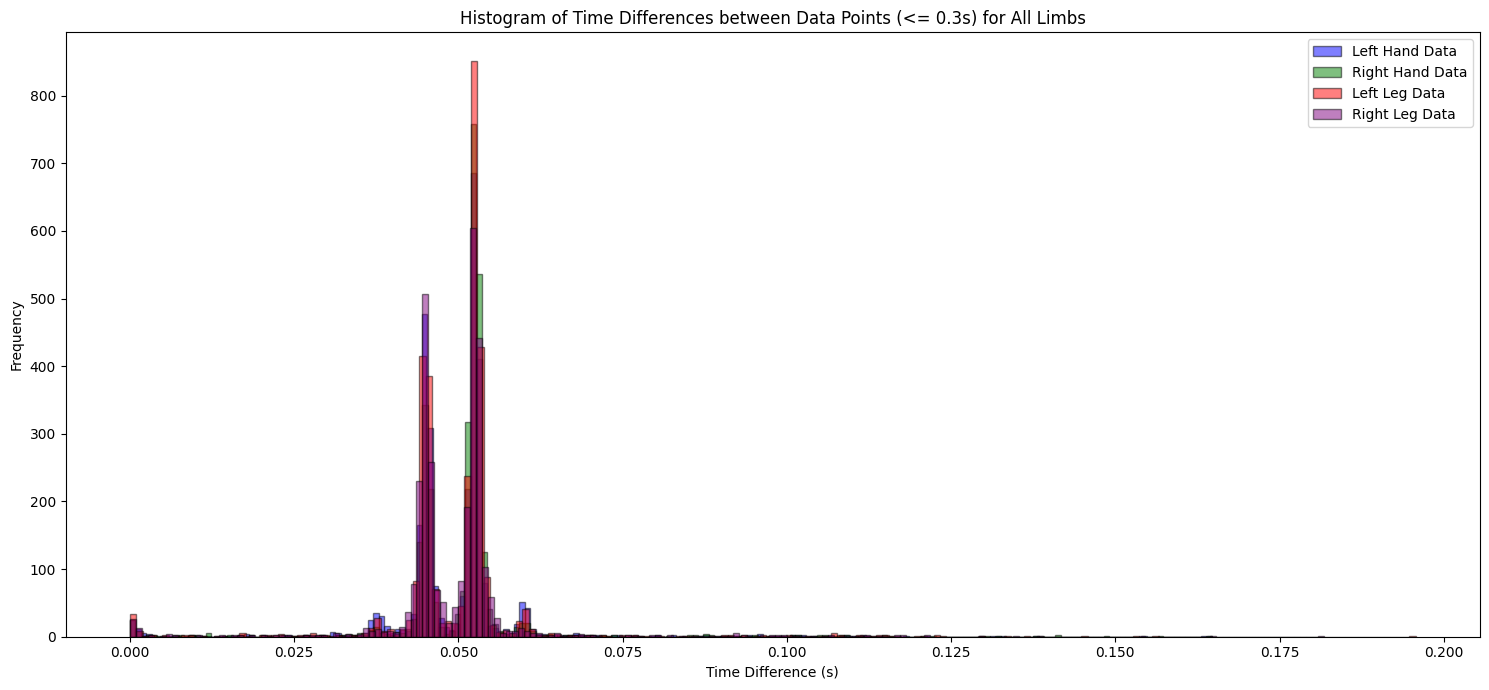

In [59]:
plt.figure(figsize=(15, 7))

for limb in limbs:
    try:
        limb_data = new_meta_h5_file[f'measurement/MetaWearControl/{limb}'][:]
        limb_data_df = pd.DataFrame(limb_data, columns=['datetime', 'acceleration'])
        
        # Convert datetime and adjust to Israel time (UTC+2)
        limb_data_df['datetime'] = pd.to_datetime(limb_data_df['datetime'], unit='s') + israel_time_offset
        
        # Skip the first row
        limb_data_df = limb_data_df.iloc[1:]
        
        # Calculate the time differences between each data point
        time_diff = limb_data_df['datetime'].diff().dt.total_seconds()
        
        # Exclude time differences greater than 0.3 seconds
        filtered_time_diff = time_diff[time_diff <= 0.7]
        
        # Plot the histogram of the filtered time differences
        plt.hist(filtered_time_diff, bins=200, color=colors[limb], edgecolor='black', alpha=0.5, label=limb.replace('_', ' ').title())
    except KeyError:
        print(f"No data found for {limb}")

plt.xlabel('Time Difference (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences between Data Points (<= 0.3s) for All Limbs')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
class AccelerationDataBuffer(object):
    def __init__(self, buffer_size):
        self.buffer_size = buffer_size
        self.acceleration_data = np.zeros(buffer_size, dtype=float)
        self.time_data = np.zeros(buffer_size, dtype=float)
        self.queue = []

    def add_data(self, acc_data, time_data):
        self.acceleration_data = np.roll(self.acceleration_data, 1)
        self.acceleration_data[0] = acc_data
        self.time_data = np.roll(self.time_data, 1)
        self.time_data[0] = time_data

    def get_data(self):
        return self.acceleration_data, self.time_data
    
    def add_to_queue(self, acc_data, time_data):
        self.queue.append((acc_data, time_data))
        if len(self.queue) > self.buffer_size:
            self.queue.pop(0)
    
    def pop_all_from_queue(self):
        data = self.queue[:]
        self.queue.clear()
        return data

In [12]:
test = AccelerationDataBuffer(100)
test.add_data(1, 1)
test.add_data(2, 2)

print(test.get_data())

test.add_to_queue(3, 3)
test.add_to_queue(4, 4)

print(test.pop_all_from_queue())


(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
[(3, 3), (4, 4)]


In [13]:
test.pop_all_from_queue()

[]